<a href="https://colab.research.google.com/github/mwelland/ENGPYHS_3NM4/blob/main/Assignments/Assignment_1_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1

Due end of day Monday Sept 16th.

##Question 1:
{method, implementation, answer}

Examine the value of sparse matricies by comparing the approximate computational efficiencies of sparse and dense solvers (on the same system). Use the %timeit function to approximate the complexity.

HINT: Refer to the last example from Thursday's lecture on how to generate, store, and apply sparse solvers.  

> Understand question: How does %timeit measure complexity? (It doesn't. It measures the time of execution which is a proxy for the algorithmic complexity)

> Plan for solution: How are you going to compare efficiencies of methods? (Use %timeit, but change the number of degrees of freedom to see how the computational complexity depends on the size of the problem).

> Modification: What if I gave you a new function 'operation count?' (The operation count is the actual quantity of interest for complexity, so you should use it instead of %timeit)

In [1]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.linalg import solve

def run_test(n):
  # Generate a random sparse matrix]
  main_diag = np.full(n, 2)
  upper_diag = np.full(n - 1, -1)
  lower_diag = np.full(n - 1, -1)
  A_sparse = diags([lower_diag, main_diag, upper_diag], offsets=[-1, 0, 1], format='csr')

  # Generate a random right-hand side vector
  b = np.random.rand(n)

  # Solve the sparse system
  result = %timeit -oq x_sparse = spsolve(A_sparse, b)
  t_sparse = result.average

  # Convert the sparse matrix to a dense matrix
  A_dense = A_sparse.toarray()

  # Solve the dense system

  result = %timeit -oq x_dense = solve(A_dense, b)
  t_dense = result.average

  print(f"For n: {n} sparse: {t_sparse:.2e} dense: {t_dense:.2e}")


run_test(100)
run_test(200)
run_test(400)
run_test(800)
run_test(1600)
run_test(3200)
run_test(6400)

print("The dense solver takes ~x8 more time for doubling n and is therefore ~O(n^3) as we expect.")
print("The sparse solver takes ~x2 more time for doubling n and is therefore ~O(n) (great success but seldom the actual case...!)")

For n: 100 sparse: 3.40e-04 dense: 2.53e-04
For n: 200 sparse: 1.12e-04 dense: 1.16e-03
For n: 400 sparse: 1.80e-04 dense: 7.63e-03
For n: 800 sparse: 4.26e-04 dense: 1.01e-01
For n: 1600 sparse: 1.30e-03 dense: 2.68e-01
For n: 3200 sparse: 1.37e-03 dense: 1.04e+00
For n: 6400 sparse: 3.69e-03 dense: 7.21e+00
The dense solver takes ~x8 more time for doubling n and is therefore ~O(n^3) as we expect.
The sparse solver takes ~x2 more time for doubling n and is therefore ~O(n) (great success but seldom the actual case...!)


## Question 2

Consider the truss:

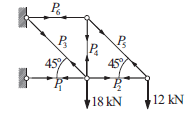


> Understand question: What does LU decomposition mean?

> Understand method: What does backsubstitution mean?

> Modification - What if I kept 18kN but only doubled the 12 kN?

###2a) Write the linear system for the tensions $P_i$ as equations and in matrix form
{answer}

$$
\begin{eqnarray*}
-P_1 + P_2 -\cos(45) P_3 &= 0 \\
\sin(45) P_3 +P_4 - 18 &= 0 \\
-P_2-\cos(45) P_5 &= 0 \\
\sin(45) P_5 - 12 &= 0 \\
\cos(45)P_5 - P_6 &= 0\\
-P_4 - \sin(45) P_5 &= 0\\
\end{eqnarray*}
$$

$$
A = \begin{bmatrix}
-1 & 1 & -\frac{1}{\sqrt{2}} & 0 & 0 & 0 \\
0 & 0 & \frac{1}{\sqrt{2}} & 1 & 0 & 0 \\
0 & -1 & 0 & 0 & -\frac{1}{\sqrt{2}} & 0 \\
0 & 0 & 0 & 0 & \frac{1}{\sqrt{2}} & 0 \\
0 & 0 & 0 & 0 & \frac{1}{\sqrt{2}} & -1 \\
0 & 0 & 0 & -1 & -\frac{1}{\sqrt{2}} & 0 \\
\end{bmatrix} \begin{bmatrix} P_1 \\ P_2 \\ P_3 \\ P_4 \\ P_5 \\ P_6 \\ \end{bmatrix} = \begin{bmatrix} 0 \\ 18 \\ 0 \\ 12 \\ 0 \\ 0 \\ \end{bmatrix}
$$




### 2b) Solve for $P_i$ using decomposition and substitution.
{method, answer}

In [2]:
import numpy as np
from scipy.linalg import lu, solve
A = np.array([
    [-1, 1, -1/np.sqrt(2), 0, 0, 0],
    [0, 0, 1/np.sqrt(2), 1, 0, 0],
    [0, -1, 0, 0, -1/np.sqrt(2), 0],
    [0, 0, 0, 0, 1/np.sqrt(2), 0],
    [0, 0, 0, 0, 1/np.sqrt(2), -1],
    [0, 0, 0, -1, -1/np.sqrt(2), 0]
])

b = np.array([0, 18, 0, 12, 0, 0])

P,L,U = lu(A)

p = solve(U, solve(L, solve(P, b)))
print(p)

print("\n Check:\n", solve(A,b))

[-42.         -12.          42.42640687 -12.          16.97056275
  12.        ]

 Check:
 [-42.         -12.          42.42640687 -12.          16.97056275
  12.        ]


###2c)  Double the loads (18 kN and 12 kN) and solve for $P_i$ again *without refactoring*.
{answer}

In [3]:
b2 = 2*b
p = solve(U, solve(L, solve(P, b2)))
print(p)

print("\n Check:\n", solve(A,b2))

[-84.         -24.          84.85281374 -24.          33.9411255
  24.        ]

 Check:
 [-84.         -24.          84.85281374 -24.          33.9411255
  24.        ]


## Question 3

Consider the matrix:

$$ A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$$

> Understand question: What is the condition number telling you? (Tells you how much numerical noisy is going to mess with your answer)

> Understand the method: What are you trying for P? (Diagonal scaling is a good choice)

> Modification: If I told you A was diagonal, what would your preconditioner be? (Inverse of the diagonal elements)

## 3a) Calculate the condition number of A
{answer}

In [ ]:
A = np.array([[1, 2], [3, 4]])

# The condition number of A (with the Frobenius norm)
np.linalg.cond(A, 'fro')

14.999999999999998

## 3b) Let's use a preconditioner matrix $P$ to improve the condition number of the product $P^{-1} A$. Give 2 examples of $P$ that improve the condition number.

Can you identify the 'perfect' preconditioner? (Consider the easiest matrix to solve!)
{answer, answer}

In [ ]:
P1 = np.diag(np.diag(A))

print("The condition number preconditioned by P :\n",P1, "\n is \n", np.linalg.cond(np.linalg.inv(P1) @ A, 'fro'))

P2 = A

print("\n")

print("The condition number preconditioned by P :\n",P2, "\n is \n", np.linalg.cond(np.linalg.inv(P2) @ A, 'fro'))

print("The matrix A is the perfect preconditioner since A^-1 A = I")

The condition number preconditioned by P :
 [[1 0]
 [0 4]] 
 is 
 13.124999999999998


The condition number preconditioned by P :
 [[1 2]
 [3 4]] 
 is 
 2.0
The matrix A is the perfect preconditioner since A^-1 A = I
